In [60]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [61]:
xs=[170,176, 94, 70, 67, 44, 88,105,212, 37,240,233,116,213, 52, 22, 76,134,168, 12,172,168,159,153, 93,224, 26,147,101,136, 74, 58, 87,139, 80,108, 27, 55,118,140,114, 85,179,206,243, 80,116, 81,178,185,185,118,196,148, 41, 82, 22,168,104,167,142,226, 97,232]
ys=[184,174, 67, 10,190,250, 11, 50,122,146, 68, 58, 96,211, 17,192,179,140,126, 91,156,233,  3,148,127, 16, 56,213,198,235, 92,121, 68,233,251, 50,  0,240,121,237,146,119,147, 69,195, 99, 51,126,  7,197,  7,118,157,240, 78,106,103,204,202,171,212, 36,130,134]
path=[
         0,         1,         2,         3,         4,        18,         6,        35,         8,        55,        25,        56,        12,        13,        14,        28,        48,        41,        62,        47,        31,        19,        22,        10,        24,        36,        26,        27,        15,        46,        54,        20,        32,        33,        52,         7,        42,        37,        38,         5,        34,        17,        43,        59,        44,        45,        53,        21,        23,        40,        50,        11,        49,        29,        30,         9,        51,        57,        58,        16,        60,        61,        39,        63,
]

In [62]:
assert(len(xs)==64)
assert(len(ys)==64)
path_set=set(path)
assert(len(path_set)==64)

In [63]:
def distance(x1,y1,x2,y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

7713.003920056433


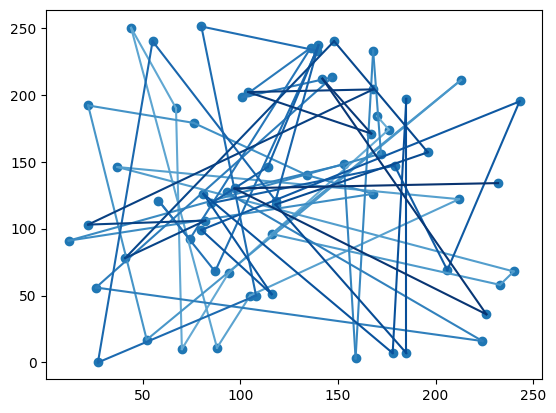

In [64]:
dist=sum([distance(xs[i],ys[i],xs[i+1],ys[i+1]) for i in range(len(path)-1)])
print(dist)
plt.clf()
plt.scatter(xs,ys)
for i in range(len(path)-1):
    plt.plot([xs[i],xs[i+1]],[ys[i],ys[i+1]],color=cm.Blues(i/len(path)/2+0.5))

7444.155299016776


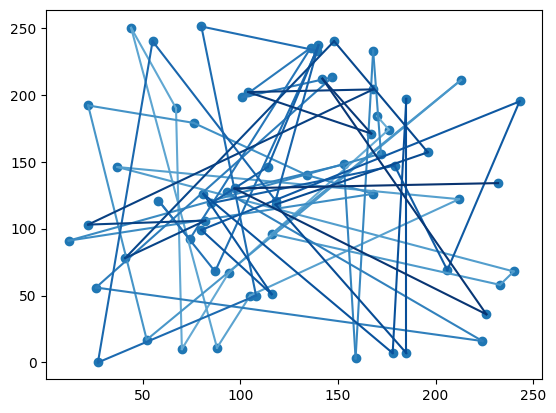

In [65]:
dist=sum([distance(xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]) for i in range(len(path)-1)])
print(dist)
plt.clf()
plt.scatter(xs,ys)
for i in range(len(path)-1):
    plt.plot([xs[i],xs[i+1]],[ys[i],ys[i+1]],color=cm.Blues(i/len(path)/2+0.5))

In [66]:
for i in range(1,len(path)-1):
    for j in range(1,i):
        # path[i-1] -> path[i] -> path[i+1] / path[j-1] -> path[j] -> path[j+1]
        d1=distance(
            xs[path[i-1]],ys[path[i-1]],xs[path[i]],ys[path[i]]
        )+distance(
            xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]
        )+distance(
            xs[path[j-1]],ys[path[j-1]],xs[path[j]],ys[path[j]]
        )+distance(
            xs[path[j]],ys[path[j]],xs[path[j+1]],ys[path[j+1]]
        )
        # path[i-1] -> path[j] -> path[i+1] / path[j-1] -> path[i] -> path[j+1]
        d2=distance(
            xs[path[i-1]],ys[path[i-1]],xs[path[j]],ys[path[j]]
        )+distance(
            xs[path[j]],ys[path[j]],xs[path[i+1]],ys[path[i+1]]
        )+distance(
            xs[path[j-1]],ys[path[j-1]],xs[path[i]],ys[path[i]]
        )+distance(
            xs[path[i]],ys[path[i]],xs[path[j+1]],ys[path[j+1]]
        )
        if d1>d2:
            print(f"{path[i]}{xs[path[i]],ys[path[i]]} <-> {path[j]}{xs[path[j]],ys[path[j]]}: {d1} -> {d2}")

2(94, 67) <-> 1(176, 174): 343.12302784123676 -> 334.79119028896855
3(70, 10) <-> 2(94, 67): 438.5254368663004 -> 321.20271740903024
4(67, 190) <-> 2(94, 67): 496.2489156249477 -> 446.6810646546753
4(67, 190) <-> 3(70, 10): 541.466644055437 -> 277.78374535271786
18(168, 126) <-> 2(94, 67): 456.31317462203674 -> 382.7663569564185
18(168, 126) <-> 3(70, 10): 501.53090305252607 -> 412.2642463450088
18(168, 126) <-> 4(67, 190): 559.2543818111733 -> 332.0828280230322
6(88, 11) <-> 2(94, 67): 380.5723254807468 -> 319.9295856342393
6(88, 11) <-> 4(67, 190): 483.5135326698834 -> 423.5671645247754
6(88, 11) <-> 18(168, 126): 443.5777916669724 -> 277.0573813364881
35(108, 50) <-> 3(70, 10): 412.19190305675227 -> 366.7840915642423
35(108, 50) <-> 18(168, 126): 429.9796408124886 -> 373.9800030749146
35(108, 50) <-> 6(88, 11): 354.2387916711986 -> 263.25390439565473
8(212, 122) <-> 2(94, 67): 454.12587526490427 -> 306.92621217317196
8(212, 122) <-> 3(70, 10): 499.3436036953936 -> 442.26092680285916

In [67]:
def linerSearchSwap():
    for i in range(1,len(path)-1):
        for j in range(1,i):
            # path[i-1] -> path[i] -> path[i+1] / path[j-1] -> path[j] -> path[j+1]
            d1=distance(
                xs[path[i-1]],ys[path[i-1]],xs[path[i]],ys[path[i]]
            )+distance(
                xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]
            )+distance(
                xs[path[j-1]],ys[path[j-1]],xs[path[j]],ys[path[j]]
            )+distance(
                xs[path[j]],ys[path[j]],xs[path[j+1]],ys[path[j+1]]
            )
            # path[i-1] -> path[j] -> path[i+1] / path[j-1] -> path[i] -> path[j+1]
            d2=distance(
                xs[path[i-1]],ys[path[i-1]],xs[path[j]],ys[path[j]]
            )+distance(
                xs[path[j]],ys[path[j]],xs[path[i+1]],ys[path[i+1]]
            )+distance(
                xs[path[j-1]],ys[path[j-1]],xs[path[i]],ys[path[i]]
            )+distance(
                xs[path[i]],ys[path[i]],xs[path[j+1]],ys[path[j+1]]
            )
            if d1>d2:
                path[i],path[j]=path[j],path[i]

3489.698914618052
3671.3879673139754
3696.804199369399
3920.914457750565
3752.4483334252322
3474.574058180111
3507.5613609128613
3936.2029910410347
3555.921664383254
3697.961079440299
3516.7655391339827
3270.4647163357026
3509.6881095274616
3473.03994850657
4277.20155568805
4085.474894963441
3855.409595128478
4138.547599684451
3860.2170939114753
4379.1012223362195
4148.930120332355
3975.749588468026
3830.175058486665
4186.288902533375
3805.990754522793
3792.5381639364127
3853.9057107513936
3718.0539604713113
3937.9068774072666
4267.582274318865
3975.0581363184697
3916.437333351597
3983.486463185892
4238.666264159363
4081.9865592178458
3422.3963163243147
3224.4501608829946
4136.727129459359
3582.290902590808
3212.907440653311
3793.113922904601
3361.736476548209
3452.661135573248
4295.796854017948
3471.7915617661693
3869.226252030879
3997.1425608776763
4033.0768932379297
3985.2295609372895
4306.301541033195
3976.99561939237
3800.061397769937
4173.901054347009
3766.9097126161128
3906.6802

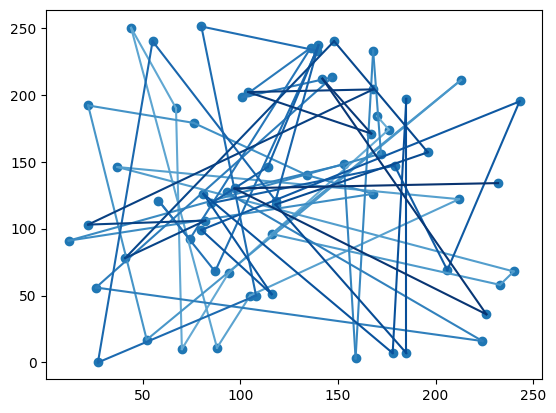

In [69]:
for _ in range(100):
    linerSearchSwap()
    dist=sum([distance(xs[path[i]],ys[path[i]],xs[path[i+1]],ys[path[i+1]]) for i in range(len(path)-1)])
    print(dist)
    plt.clf()
    plt.scatter(xs,ys)
    for i in range(len(path)-1):
        plt.plot([xs[i],xs[i+1]],[ys[i],ys[i+1]],color=cm.Blues(i/len(path)/2+0.5))